# A.&nbsp;Basic Statistical Concepts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

I will begin with some fundamental statistical concepts that will serve as the foundation for all future operations. This type of review will always be useful whenever you are uncertain about something. Additionally, it's important to become familiar with commonly used data analysis libraries, such as [NumPy](https://numpy.org/doc/stable/user/index.html#user),&nbsp;[Pandas](https://pandas.pydata.org/docs/getting_started/index.html),&nbsp;[SciPy](https://scipy.org/),&nbsp;[Scikit-Learn](https://scikit-learn.org/stable/),&nbsp;and [others](https://guides.lib.uci.edu/dataanalysis/pythonlibraries)&nbsp;\(a list of Python libraries for data analysis is available on the [UCI Library website](https://www.lib.uci.edu/)\).

Since our goal is to understand Gaussian Processes for machine learning, we will focus on supervised learning, where each input has a corresponding output. To do this, let's start by defining a \(training\) dataset&nbsp;$D=\{(x_i,y_i)|i=0,...,n\}$, with $n$ observations. To explore these concepts, we will generate random data to examine properties like mean, variance, covariance and so forth, laying the groundwork for deeper insights into Gaussian Processes.

[[ 8.44850823 -9.28510294]
 [ 2.07414036 -9.13222212]
 [ 9.56779724 -9.25758003]
 [ 8.442941   -9.76762912]
 [ 6.66507774 -9.7125907 ]
 [ 7.62341514 -4.59303904]
 [ 1.61039186 -9.63556074]
 [ 7.59744008 -3.88362027]
 [ 2.81175883 -4.72883192]
 [ 8.01483997 -9.46453548]
 [ 6.00765422 -4.83671755]
 [ 9.72323549 -1.65960003]
 [ 5.63380912  2.43891491]
 [ 8.31922014  2.00982587]
 [ 3.96524164 -8.84852637]
 [ 9.04273065 -1.22678134]
 [ 9.111664   -9.57569369]
 [ 9.93149814 -8.11981829]
 [ 7.65270617  0.75470033]
 [ 2.01097772 -6.46168887]]


(-10.0, 3.0)

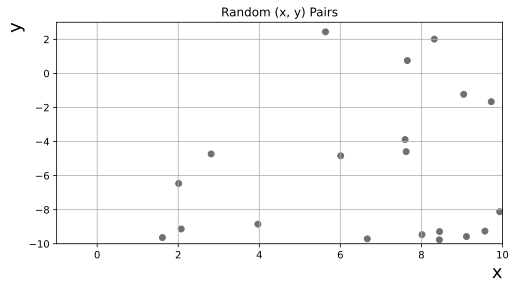

In [ ]:
# Set the number of pairs you would like
num_pairs = 20

# Set the range for x and y coordinates
x_min, x_max = -1, 10
y_min, y_max = -10, 3

# Generate random numbers for x and y coordinates
x = np.random.uniform(x_min, x_max, num_pairs)
y = np.random.uniform(y_min, y_max, num_pairs)
# Make x, y into pairs
pairs = np.column_stack((x, y))

print(pairs)

# Plotting the (x,y) pair
fig, ax = plt.subplots(figsize=(8, 4)) # Set the figure size
ax.scatter(x, y, color='#6F6F6F')  # Plot x and y as (HEX color code) scatter plot
ax.set_title('Random (x, y) Pairs')
ax.set_xlabel('x', loc='right', fontsize=18)
ax.set_ylabel('y', loc='top', fontsize=18)
ax.grid(True)
ax.set_xlim(x_min, x_max)  # The limits for x-axis
ax.set_ylim(y_min, y_max)  # The limits for y-axis

For a set of $(x,y)$ pair, or for any dataset, we should always focus on several key statistical characteristics that provide insights into the data:

**Mean:** The average of the $x$ values and the $y$ values. Calculate the mean using [np.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html);<br>

**Variance:** The spread of the $x$ and $y$ values. Calculate the variance using [np.var()](https://numpy.org/doc/stable/reference/generated/numpy.var.html);<br>

**Standard Deviation:** The square root of the variance, rpresenting how much the $x$ and $y$ values deviate from their respective means. Calculate the standard deviation using [np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html);<br>

**Covariance:** How the $x$ and $y$ values vary together. Calculate the covariance using [np.cov(x, y)](https://numpy.org/doc/stable/reference/generated/numpy.cov.html);<br>
&nbsp;&nbsp;&nbsp;Covariance Matrix:
$$
\begin{bmatrix}
\operatorname{Var}(x) & \operatorname{Cov}(x,y) \\
\operatorname{Cov}(y,x) & \operatorname{Var}(y)
\end{bmatrix}
$$<br>

**Correlation:** The strength and direction of the linear relationship between $x$ and $y$. Calculate the correlation using [np.corrcoef(x, y)](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).<br>
&nbsp;&nbsp;&nbsp;Correlation Matrix:
$$
\begin{bmatrix}
1 & \operatorname{Corr}(x,y) \\
\operatorname{Corr}(y,x) & 1
\end{bmatrix}
$$<br>

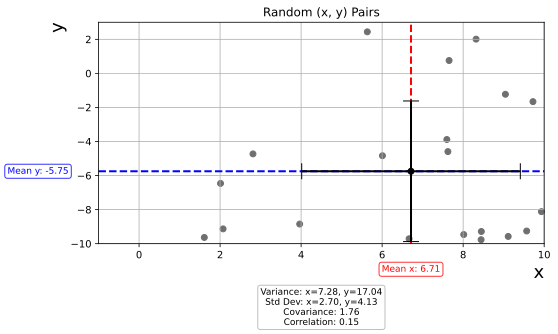

In [ ]:
# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the variance of x and y
var_x = np.var(x)
var_y = np.var(y)

# Calculate the standard deviation of x and y
std_x = np.std(x)
std_y = np.std(y)

# Calculate the covariance
cov_xy = np.cov(x, y)[0, 1] # Check above Covariance matrix, element[0,1] is Cov(x, y)

# Calculate the correlation
corr_xy = np.corrcoef(x, y)[0, 1]

# Update the plot
ax.axvline(x=mean_x, color='r', linestyle='--', linewidth=2, label='Mean x')
ax.axhline(y=mean_y, color='b', linestyle='--', linewidth=2, label='Mean y')

ax.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='o', color='black', capsize=8, elinewidth=2)# Error bars for standard deviation

ax.annotate(f'Mean x: {mean_x:.2f}', xy=(mean_x, y_min), xycoords='data', xytext=(0, -30),
             textcoords='offset points', ha='center', va='bottom', color='red', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white', alpha=0.8))

ax.annotate(f'Mean y: {mean_y:.2f}', xy=(x_min, mean_y), xycoords='data', xytext=(-30, 0),
             textcoords='offset points', ha='right', va='center', color='blue', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white', alpha=0.8))

# Displaying additional statistics
stats_text = f'Variance: x={var_x:.2f}, y={var_y:.2f}\nStd Dev: x={std_x:.2f}, y={std_y:.2f}\nCovariance: {cov_xy:.2f}\nCorrelation: {corr_xy:.2f}'
ax.text(0.5, -0.2, stats_text, transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white', alpha=0.5))

display(fig)

For statistical visualization, [matplotlib](https://https://matplotlib.org/stable/users/index) is indeed a powerful tool. However, mastering [matplotlib]((https://https://matplotlib.org/stable/users/index)) and using it for statistical visualization requires a significant amount of practice, and it may take numerous attempts to create an aesthetically pleasing graph. No worries, there are also tools built on top of matplotlib that are specifically targeted at statistical visualization, such as [seaborn](https://https://seaborn.pydata.org/tutorial.html).

In [ ]:
%reset -f
# Clear all previously defined variables and functions

# B.&nbsp;Probability Theory<br>

When working with Gaussian processe \($GP$\), a fundamental concept in machine learning and statistics, it is important to understand key probability distributions.

## Conditional Probability

A brief introduction to **conditional probability**:&nbsp;the [conditional probability](https://www.stat.yale.edu/Courses/1997-98/101/condprob.htm) of an event $B$ is the probability that event $B$ will occur given that event $A$ has already occurred, written as $P(B \mid A)$. When events $A$ and $B$ are independent (meaning that the occurrence of event $A$ does not influence the probability of event $B$), the conditional probability of event $B$ given event $A$ is just the probability of event B, denoted as $P(B)$.<br>
This can also be interpreted as the fraction of the probability of $B$ that overlaps with $A$, or the ratio of the probability of both events occurring to the probability of the "given" event occurring \(how often $B$ occurs compared to not occurring, assuming $A$ has already occurred\)<sup>[3]</sup>：<br>
$$
P(B \mid A)=\frac{P(B \cap A)}{P(A)}
$$

First column name  | Second column name
-------------------|------------------
Row 1, Col 1       | Row 1, Col 2
Row 2, Col 1       | Row 2, Col 2

## Marginal Distribution

## Joint Probability Distribution

# C.&nbsp;Reference


[1]&nbsp;Williams, C. K., & Rasmussen, C. E. (2006). [Gaussian processes for machine learning](https://direct.mit.edu/books/monograph/2320/Gaussian-Processes-for-Machine-Learning) (Vol. 2, No. 3, p. 4). Cambridge, MA: MIT press<br>
[2]&nbsp;Wikipedia contributors. (2024, September 12). Normal distribution. In Wikipedia, The Free Encyclopedia. Retrieved 03:21, September 14, 2024, from https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1245394425<br>
[3]&nbsp;Wikipedia contributors. (2024, August 6). Conditional probability. In Wikipedia, The Free Encyclopedia. Retrieved 03:56, September 14, 2024, from https://en.wikipedia.org/w/index.php?title=Conditional_probability&oldid=1238900831<br>
[4]&nbsp;Wikipedia contributors. (2023, October 30). Marginal distribution. In Wikipedia, The Free Encyclopedia. Retrieved 03:37, September 14, 2024, from https://en.wikipedia.org/w/index.php?title=Marginal_distribution&oldid=1182695783<br>
[5]&nbsp;Wikipedia contributors. (2024, May 19). Joint probability distribution. In Wikipedia, The Free Encyclopedia. Retrieved 03:38, September 14, 2024, from https://en.wikipedia.org/w/index.php?title=Joint_probability_distribution&oldid=1224691985<br>

**Disclaimer:**<br>
[1]&nbsp;This project is not intended for commercial use; it is solely for the purpose of showcasing my personal learning journey and aims to assist others who are passionate about learning. All materials included are appropriately credited to the original content creators through **links** or **citations**;<br>
[2]&nbsp;Generative AI is utilized for text editing, code review, and related purposes.<br>